In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'C:\Users\HP\Documents\global economy.csv')

In [3]:
df.head()

,Countries,Year,AMA exchange rate,Population,Currency,Per capita GNI,Agriculture,Construction,Exports,Final consumption expenditure,Government expenditure,Household consumption expenditure,Imports,Manufacturing,Transport,GDP
0,Afghanistan,1970,0.044998,10752971,Afghani,164,8.699174e+08,46793902.0,165618722.0,1.663221e+09,112126986.0,1.551094e+09,195277226.0,376690811.0,83917200.0,1.731436e+09
1,Afghanistan,1971,0.044998,11015857,Afghani,168,9.108281e+08,48994113.0,193580300.0,1.796541e+09,121114833.0,1.675426e+09,276296480.0,394401164.0,87860382.0,1.812838e+09
2,Afghanistan,1972,0.044998,11286753,Afghani,149,8.279453e+08,44535223.0,227654380.0,1.607159e+09,108347543.0,1.498812e+09,290370350.0,358512865.0,79864525.0,1.647900e+09
3,Afghanistan,1973,0.044998,11575305,Afghani,150,8.554869e+08,46018542.0,226913554.0,1.617037e+09,109013455.0,1.508024e+09,262962880.0,370445793.0,82528885.0,1.702716e+09
4,Afghanistan,1974,0.044998,11869879,Afghani,177,1.035913e+09,55721659.0,284938449.0,1.907408e+09,128588961.0,1.778819e+09,305679151.0,448552790.0,99918604.0,2.061729e+09


In [4]:
df.columns= df.columns.str.strip()              #code to align each column header 

In [5]:
df['Year'].nunique()

52

In [6]:
missing_percentage_Agriculture=df['Agriculture'].isnull().mean() *100
missing_percentage_Agriculture

1.1510654490106544

In [7]:
#because the percentage of missing values is greater than 1 and less than 20, we reploace with the mean
df['Agriculture'].fillna(df['Agriculture'].mean(), inplace= True)

In [8]:
missing_percentage_Exports=df['Exports'].isnull().mean() *100
print (missing_percentage_Exports)


0.1997716894977169


In [9]:
missing_percentage_GOVT=df['Government expenditure'].isnull().mean() *100
missing_percentage_GOVT

0.4946727549467275

In [10]:
missing_percentage_household=df['Household consumption expenditure'].isnull().mean() *100
missing_percentage_household

0.4946727549467275

In [11]:
missing_percentage_imports=df['Imports'].isnull().mean() *100
missing_percentage_imports

0.3995433789954338

In [12]:
missing_percentage_Transport=df['Transport'].isnull().mean() *100
missing_percentage_Transport

0.4661339421613394

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Countries                          10512 non-null  object 
 1   Year                               10512 non-null  int64  
 2   AMA exchange rate                  10512 non-null  float64
 3   Population                         10512 non-null  int64  
 4   Currency                           10512 non-null  object 
 5   Per capita GNI                     10512 non-null  int64  
 6   Agriculture                        10512 non-null  float64
 7   Construction                       10512 non-null  float64
 8   Exports                            10491 non-null  float64
 9   Final consumption expenditure      10512 non-null  float64
 10  Government expenditure             10460 non-null  float64
 11  Household consumption expenditure  10460 non-null  flo

In [14]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10418 entries, 0 to 10511
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Countries                          10418 non-null  object 
 1   Year                               10418 non-null  int64  
 2   AMA exchange rate                  10418 non-null  float64
 3   Population                         10418 non-null  int64  
 4   Currency                           10418 non-null  object 
 5   Per capita GNI                     10418 non-null  int64  
 6   Agriculture                        10418 non-null  float64
 7   Construction                       10418 non-null  float64
 8   Exports                            10418 non-null  float64
 9   Final consumption expenditure      10418 non-null  float64
 10  Government expenditure             10418 non-null  float64
 11  Household consumption expenditure  10418 non-null  float64


In [15]:
df['GDP_in_dollars']= df['GDP'] * df['AMA exchange rate'] 
df.head(5)

,Countries,Year,AMA exchange rate,Population,Currency,Per capita GNI,Agriculture,Construction,Exports,Final consumption expenditure,Government expenditure,Household consumption expenditure,Imports,Manufacturing,Transport,GDP,GDP_in_dollars
0,Afghanistan,1970,0.044998,10752971,Afghani,164,8.699174e+08,46793902.0,165618722.0,1.663221e+09,112126986.0,1.551094e+09,195277226.0,376690811.0,83917200.0,1.731436e+09,7.791188e+07
1,Afghanistan,1971,0.044998,11015857,Afghani,168,9.108281e+08,48994113.0,193580300.0,1.796541e+09,121114833.0,1.675426e+09,276296480.0,394401164.0,87860382.0,1.812838e+09,8.157484e+07
2,Afghanistan,1972,0.044998,11286753,Afghani,149,8.279453e+08,44535223.0,227654380.0,1.607159e+09,108347543.0,1.498812e+09,290370350.0,358512865.0,79864525.0,1.647900e+09,7.415292e+07
3,Afghanistan,1973,0.044998,11575305,Afghani,150,8.554869e+08,46018542.0,226913554.0,1.617037e+09,109013455.0,1.508024e+09,262962880.0,370445793.0,82528885.0,1.702716e+09,7.661955e+07
4,Afghanistan,1974,0.044998,11869879,Afghani,177,1.035913e+09,55721659.0,284938449.0,1.907408e+09,128588961.0,1.778819e+09,305679151.0,448552790.0,99918604.0,2.061729e+09,9.277457e+07


In [16]:
#Aggregate GDP in Dollars by country in the year 2020
df_2020=df[df['Year']==2020]
gdp_by_country_2020= df_2020.groupby('Countries')['GDP_in_dollars'].sum().reset_index()

#Sort the results to find thr top 10 and bottom 10
gdp_by_country_2020_sorted=gdp_by_country_2020.sort_values(by='GDP_in_dollars', ascending=False)


In [17]:
#Display top 10 countries
top_10_countries_2020=gdp_by_country_2020_sorted.head(10)

In [18]:
pd.set_option('display.float_format','{:.2f}'.format)
print ("Top 10 Countries By GDP in Dollars:")
print (top_10_countries_2020)

Top 10 Countries By GDP in Dollars:
                        Countries       GDP_in_dollars
89    Iran (Islamic Republic of)  40595543350080000.00
88                     Indonesia  15457135678200000.00
206                     Viet Nam   8053303810510000.00
153            Republic of Korea   1935635966120000.00
43                      Colombia    997610599440000.00
203                   Uzbekistan    602192996146810.50
95                         Japan    538143894792000.00
146                     Paraguay    239914728994495.44
90                          Iraq    215752000000000.00
39                         Chile    200559983143300.00


In [19]:
least_10_countries_2020=gdp_by_country_2020_sorted.tail(10)
pd.set_option('display.float_format','{:.2f}'.format)
print ("Top 10 Countries By GDP in Dollars:")
print (least_10_countries_2020)

Top 10 Countries By GDP in Dollars:
                      Countries  GDP_in_dollars
193   Turks and Caicos Islands     924583000.00
5                     Anguilla     697790000.70
46                Cook Islands     437011240.39
122         Micronesia (FS of)     407515928.00
99                    Kiribati     258139184.97
143                      Palau     251855609.00
118           Marshall Islands     244462448.00
131                      Nauru     197112283.69
126                 Montserrat     183070000.80
194                     Tuvalu      75200000.00


In [20]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

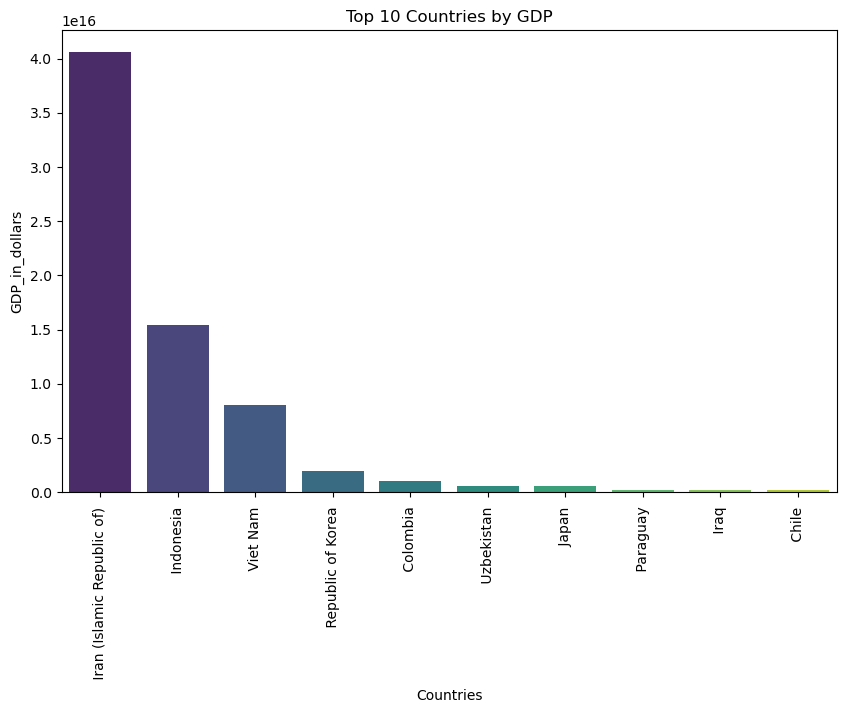

In [48]:
#Plot top 10 Countries for 2020
plt.figure(figsize=(10,6))
sns.barplot(x='Countries', y= 'GDP_in_dollars', data=top_10_countries_2020, palette= 'viridis',errorbar=None)
plt.savefig('top 10 countries', bbox_inches='tight')
plt.title('Top 10 Countries by GDP')


plt.xticks(rotation=90) # Rotate so that the labels don't overlap
plt.show()


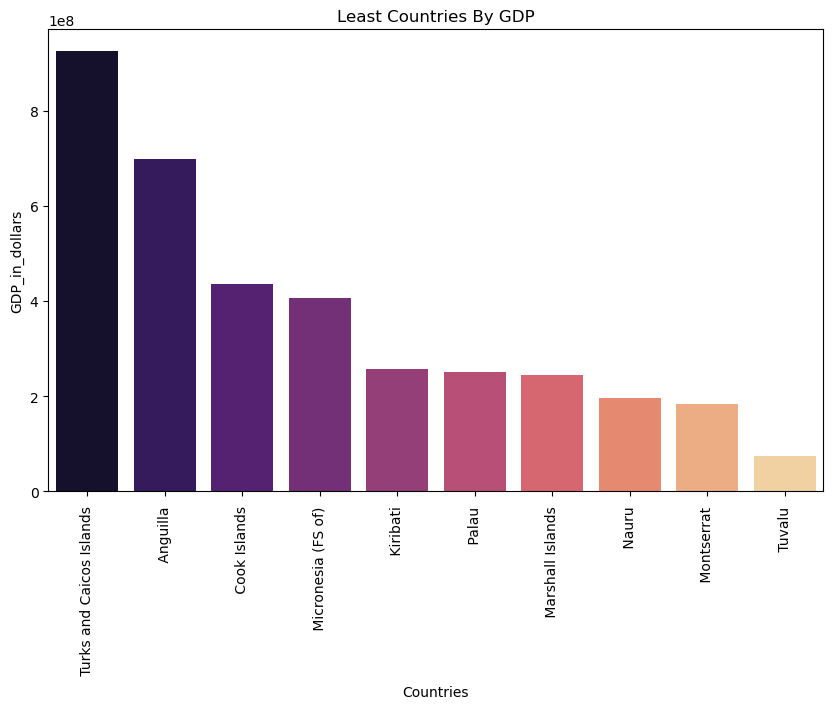

In [49]:
#Plot Bottom 10 Countries for 2020
plt.figure(figsize=(10,6))
plt.title('Least Countries By GDP')
ax=sns.barplot(x='Countries', y= 'GDP_in_dollars', data=least_10_countries_2020, palette= 'magma',errorbar=None)
plt.savefig('least 10 countries', bbox_inches='tight')
plt.xticks(rotation=90) # Rotate so that the labels don't overlap
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


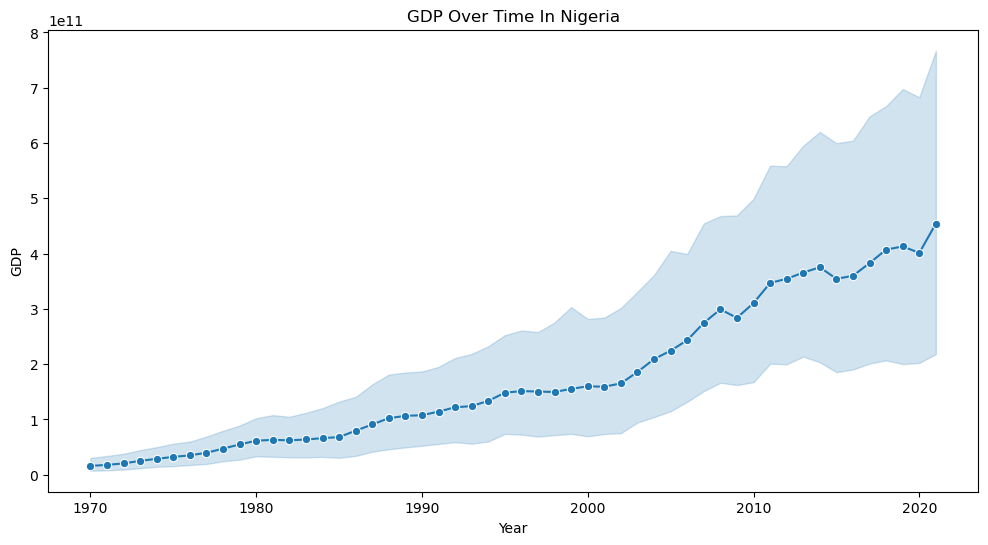

In [50]:
#Times series of GDP in NIgeria
Country='Nigeria'
df_country=df[df['Countries']== Country]
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y= 'GDP', data=df, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over Time In Nigeria')
plt.grid=(True)
plt.savefig('gdp overtime in nigeria', bbox_inches='tight')
plt.show()

In [54]:
#Calculate the contribution of each sector to GDP
Country=' Nigeria '
df_country=df[df['Countries']== Country]
df_coutry=df_country[df_country['GDP']>0]
df_country['Agriculture contribution']=(df_country['Agriculture']/df_country['GDP'])*100
df_country['Construction contribution']=(df_country['Construction']/df_country['GDP'])*100
df_country['Exports contribution']=(df_country['Exports']/df_country['GDP'])*100
df_country['Manufacturing contribution']=(df_country['Manufacturing']/df_country['GDP'])*100
df_country['Transport contribution']=(df_country['Transport']/df_country['GDP'])*100
print (df_country[[ 'Year', 'Agriculture contribution', 'Construction contribution', 'Exports contribution',
                   'Manufacturing contribution', 'Transport contribution']].head(52))

      Year  Agriculture contribution  Construction contribution  \
6958  1970                     18.90                       9.17   
6959  1971                     20.46                       8.56   
6960  1972                     19.14                       9.70   
6961  1973                     17.09                       9.23   
6962  1974                     14.95                       6.81   
6963  1975                     14.71                       7.31   
6964  1976                     13.56                       8.37   
6965  1977                     13.45                       8.44   
6966  1978                     13.74                       8.10   
6967  1979                     13.38                       7.28   
6968  1980                     12.68                       6.95   
6969  1981                     12.21                       7.33   
6970  1982                     13.52                       6.17   
6971  1983                     15.00                       5.2

C:\Users\HP\AppData\Local\Temp\ipykernel_10416\888178842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Agriculture contribution']=(df_country['Agriculture']/df_country['GDP'])*100
C:\Users\HP\AppData\Local\Temp\ipykernel_10416\888178842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Construction contribution']=(df_country['Construction']/df_country['GDP'])*100
C:\Users\HP\AppData\Local\Temp\ipykernel_10416\888178842.py:7: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

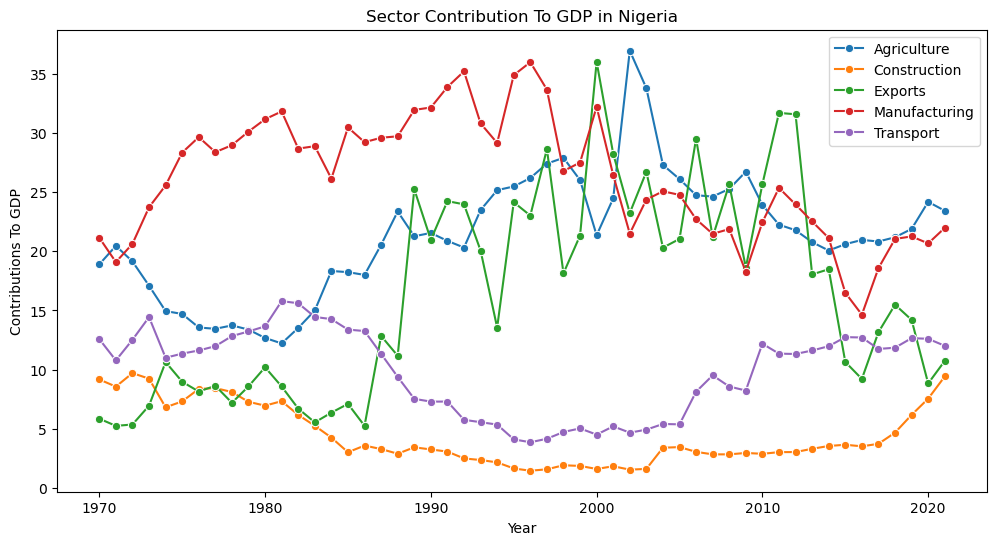

In [57]:
plt.figure (figsize=(12,6))
sns.lineplot(x='Year', y='Agriculture contribution', data=df_country, marker='o', label='Agriculture')
sns.lineplot(x='Year', y='Construction contribution', data=df_country, marker='o', label='Construction')
sns.lineplot(x='Year', y='Exports contribution', data=df_country, marker='o', label='Exports')
sns.lineplot(x='Year', y='Manufacturing contribution', data=df_country, marker='o', label='Manufacturing')
sns.lineplot(x='Year', y='Transport contribution', data=df_country, marker='o', label='Transport')
plt.title('Sector Contribution To GDP in Nigeria')
plt.xlabel('Year')
plt.ylabel('Contributions To GDP')
plt.legend()
plt.savefig('countries', bbox_inches='tight')
plt.show()

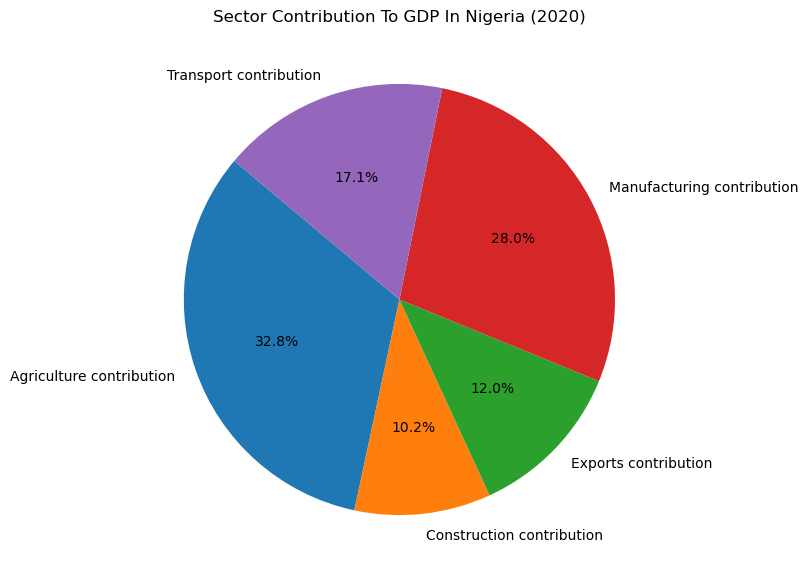

In [56]:
df_Nigeria_2020=df_country[df_country['Year']==2020]
sectors=['Agriculture contribution', 'Construction contribution','Exports contribution','Manufacturing contribution','Transport contribution']
contributions=df_Nigeria_2020[sectors].iloc[0]

plt.figure(figsize=(10,7))
plt.pie(contributions, labels=sectors,autopct='%1.1f%%',startangle=140)
plt.title('Sector Contribution To GDP In Nigeria (2020)')
plt.savefig('sector contribution to gdp', bbox_inches='tight')
plt.show()

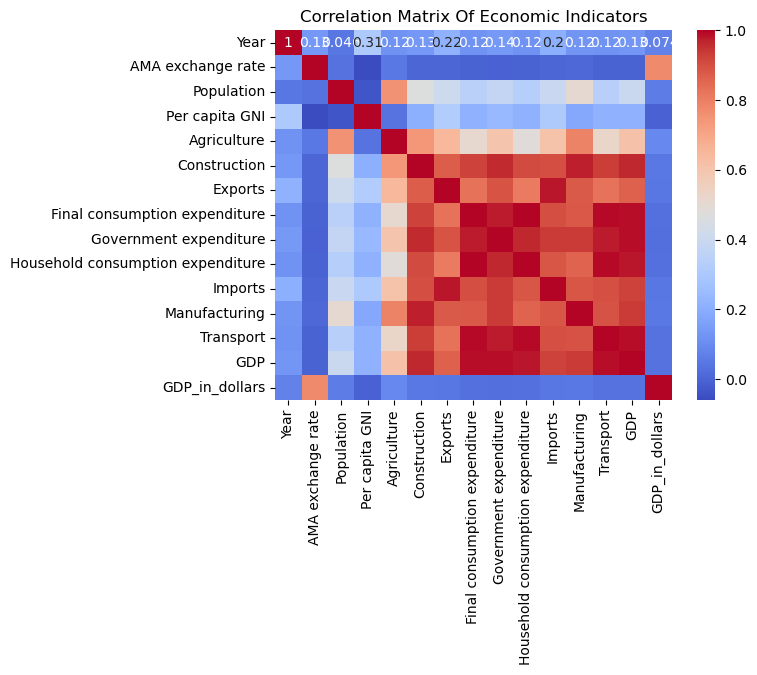

In [58]:
#Correlation Matrix
df_numeric= df.select_dtypes(include=['float64','int64'])
corr_matrix= df_numeric.corr()
sns.heatmap (corr_matrix, annot=True, cmap='coolwarm')
plt.title ('Correlation Matrix Of Economic Indicators')
plt.savefig('heatmap', bbox_inches='tight')
plt.show()

In [40]:
#Linear Regression (predicting GDP based on Population and exports
from sklearn.linear_model import LinearRegression
z=df[['Population','Exports','Manufacturing','Transport','Construction']]
y=df['GDP']

lm=LinearRegression()
lm.fit(z,y)

LinearRegression()

In [41]:
print ('intercept:', lm.intercept_)
print ('coefficient:', lm.coef_)

intercept: -1925449695.5193481
coefficient: [130.36330119   0.26070267   0.52890338   7.75628881   2.63618924]


In [42]:
lm.score(z,y)

0.9971320030340688

In [43]:
yhat=lm.predict(z)

In [39]:
from sklearn.metrics import mean_squared_error
mse3= mean_squared_error(y,yhat)
mse3

3.3515954658991564e+21

### Therefore the model will be
### GDP=-1925449695.5193481 + (130.36330119 * Population) + ( 0.26070267 * Exports) + (0.52890338 * Manufacturing)
### + (7.75628881 * Transport) + (2.63618924 * Construction)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10418 entries, 0 to 10511
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Countries                          10418 non-null  object 
 1   Year                               10418 non-null  int64  
 2   AMA exchange rate                  10418 non-null  float64
 3   Population                         10418 non-null  int64  
 4   Currency                           10418 non-null  object 
 5   Per capita GNI                     10418 non-null  int64  
 6   Agriculture                        10418 non-null  float64
 7   Construction                       10418 non-null  float64
 8   Exports                            10418 non-null  float64
 9   Final consumption expenditure      10418 non-null  float64
 10  Government expenditure             10418 non-null  float64
 11  Household consumption expenditure  10418 non-null  float64
